In [30]:
import pandas as pd

In [31]:
df = pd.read_csv(r"../data/Trips_by_Distance.csv")

## As stated previously, 'National' is the only 'Level' value that is of statistical significance for us
### Thus, we will work only with those rows marked with ```df['Level'] == 'National'```
### And modify the dataframe accordingly, to get rid of county- and state-specific columns

In [ ]:
df = df[(df['Level']=='National')]

In [33]:
print((df.isna().sum()/df.shape[0])*100)

Level                               0.0
Date                                0.0
State FIPS                        100.0
State Postal Code                 100.0
County FIPS                       100.0
County Name                       100.0
Population Staying at Home          0.0
Population Not Staying at Home      0.0
Number of Trips                     0.0
Number of Trips <1                  0.0
Number of Trips 1-3                 0.0
Number of Trips 3-5                 0.0
Number of Trips 5-10                0.0
Number of Trips 10-25               0.0
Number of Trips 25-50               0.0
Number of Trips 50-100              0.0
Number of Trips 100-250             0.0
Number of Trips 250-500             0.0
Number of Trips >=500               0.0
Row ID                              0.0
Week                                0.0
Month                               0.0
dtype: float64


We can see that
- State FIPS
- State Postal Code
- County FIPS
- County Name
Consist entirely of 'NaN' values, since they were only assigned to county and/or state-level metrics<br>
This means that the columns can be safely dropped.

In [34]:
df.drop(labels=df.columns[(df.isna().sum()/df.shape[0])*100>0],axis=1,inplace=True)

We run the same command again, to see that there are no null elements now

In [35]:
print((df.isna().sum()/df.shape[0])*100)

Level                             0.0
Date                              0.0
Population Staying at Home        0.0
Population Not Staying at Home    0.0
Number of Trips                   0.0
Number of Trips <1                0.0
Number of Trips 1-3               0.0
Number of Trips 3-5               0.0
Number of Trips 5-10              0.0
Number of Trips 10-25             0.0
Number of Trips 25-50             0.0
Number of Trips 50-100            0.0
Number of Trips 100-250           0.0
Number of Trips 250-500           0.0
Number of Trips >=500             0.0
Row ID                            0.0
Week                              0.0
Month                             0.0
dtype: float64


Now we will check if the 'Date' Column has the correct data type

In [36]:
type(df.iloc[0]['Date'])

str

Since the ```'Date'``` column is of type ```String```, we will convert it to DateTime (Chen, 2018)

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

In [38]:
df['Date']

0        2019-01-01
1        2019-01-02
2        2019-01-03
3        2019-01-04
4        2019-01-05
            ...    
157189   2021-06-15
157190   2021-06-16
157191   2021-06-17
157192   2021-06-18
157193   2021-06-19
Name: Date, Length: 901, dtype: datetime64[ns]

In [39]:
df.dtypes

Level                                     object
Date                              datetime64[ns]
Population Staying at Home               float64
Population Not Staying at Home           float64
Number of Trips                          float64
Number of Trips <1                       float64
Number of Trips 1-3                      float64
Number of Trips 3-5                      float64
Number of Trips 5-10                     float64
Number of Trips 10-25                    float64
Number of Trips 25-50                    float64
Number of Trips 50-100                   float64
Number of Trips 100-250                  float64
Number of Trips 250-500                  float64
Number of Trips >=500                    float64
Row ID                                    object
Week                                       int64
Month                                      int64
dtype: object

Now our column has the correct data type. This will allow us to work with time series, intervals and time deltas (Chen, 2018)

We save the dataframe to "National_only.csv" to avoid these steps in any future operations

In [40]:
df.to_csv(r'../data/National_only.csv')

In [94]:
grouped_by_week = df.groupby(by='Week').mean(numeric_only=True)

In [95]:
mean_staying = grouped_by_week['Population Staying at Home']
mean_traveling = grouped_by_week['Population Not Staying at Home']

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns


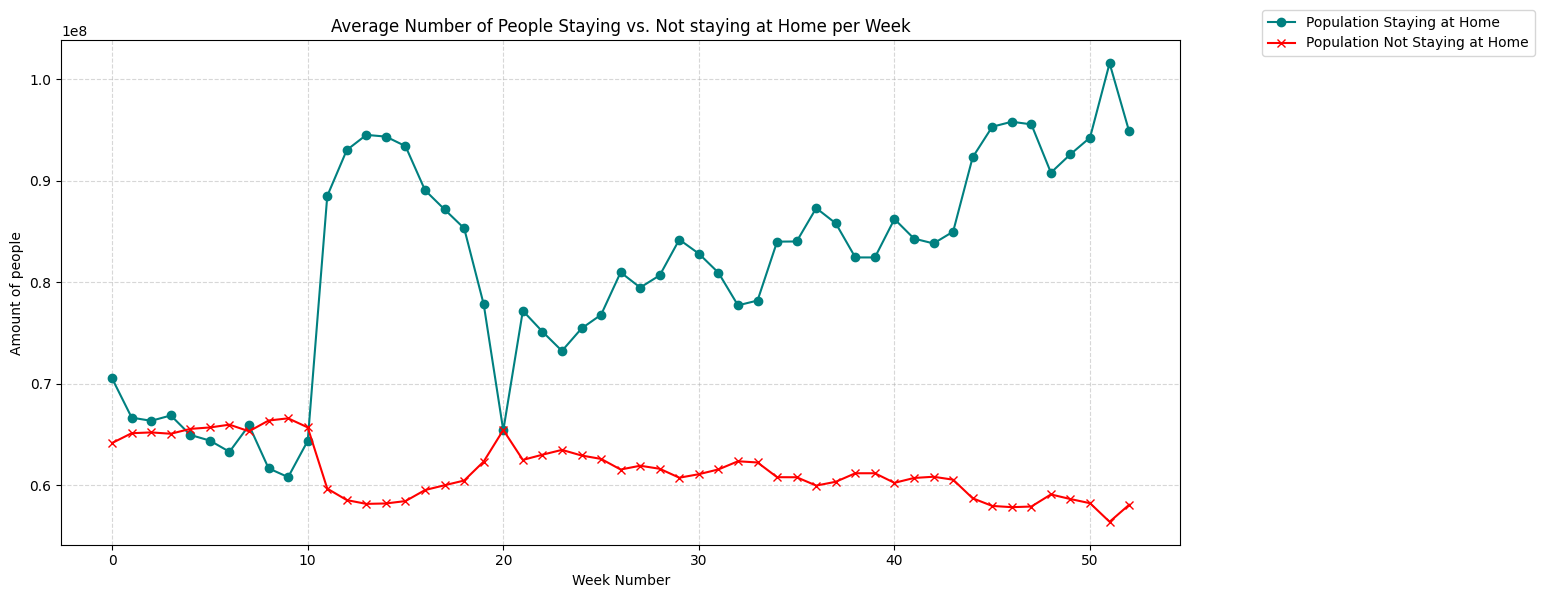

In [99]:
weeks = grouped_by_week.index
ax = plt.figure(figsize=(12, 6))
mean_staying.plot(marker='o', color='teal')
(mean_traveling/4).plot(marker='x',color='red')
plt.title('Average Number of People Staying vs. Not staying at Home per Week')
plt.xlabel('Week Number')
plt.ylabel('Amount of people')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

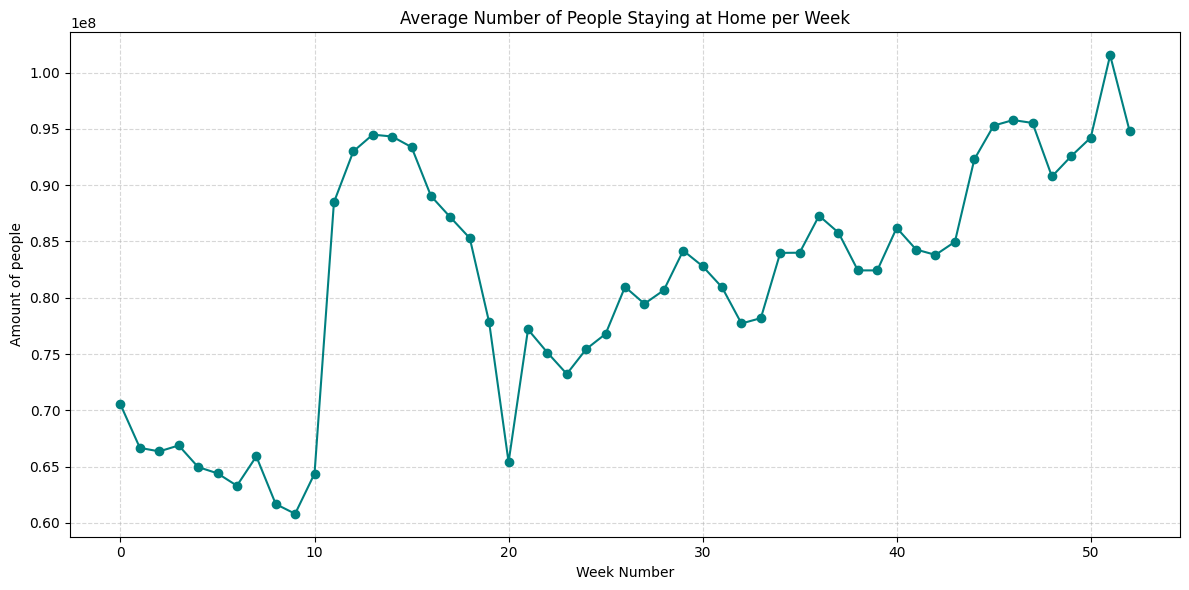

In [98]:
ax = plt.figure(figsize=(12, 6))
mean_staying.plot(marker='o', color='teal')
plt.title('Average Number of People Staying at Home per Week')
plt.xlabel('Week Number')
plt.ylabel('Amount of people')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

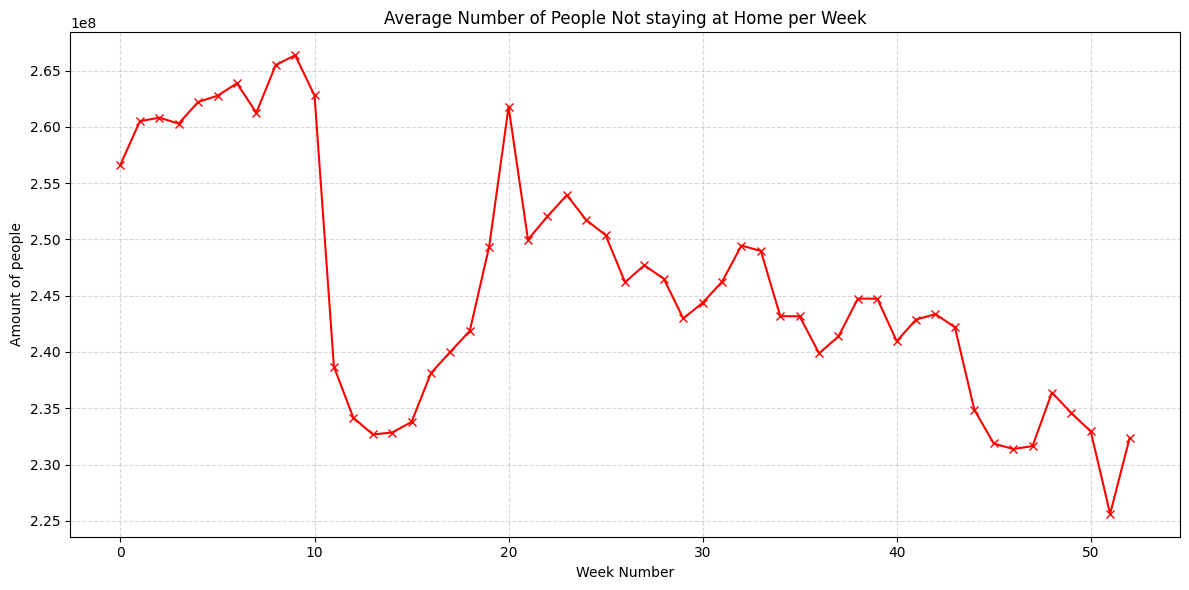

In [100]:
ax = plt.figure(figsize=(12, 6))
mean_traveling.plot(marker='x',color='red')
plt.title('Average Number of People Not staying at Home per Week')
plt.xlabel('Week Number')
plt.ylabel('Amount of people')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

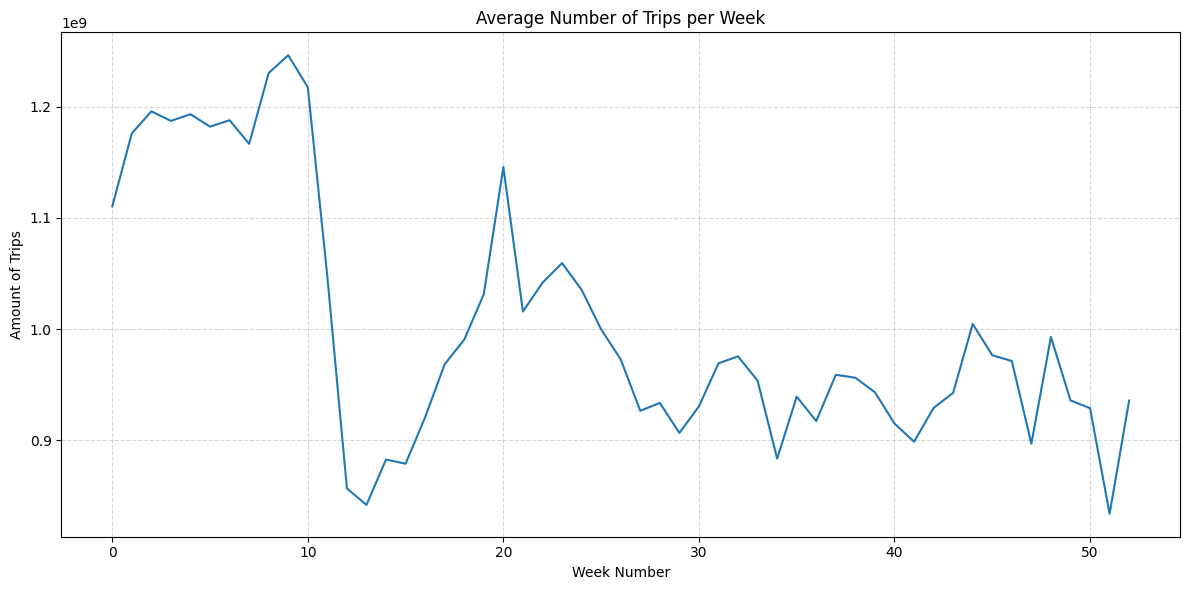

In [101]:
ax = plt.figure(figsize=(12, 6))
plt.plot(weeks, grouped_by_week['Number of Trips'])
plt.title('Average Number of Trips per Week')
plt.xlabel('Week Number')
plt.ylabel('Amount of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Axes: >

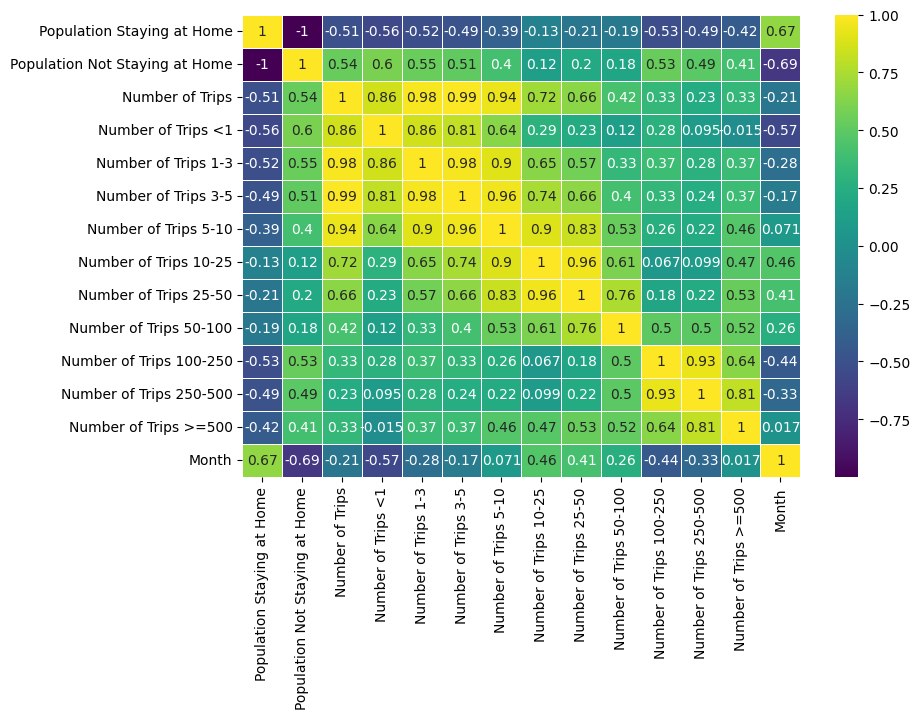

In [48]:
grouped_by_week = df.groupby(by='Week').mean(numeric_only=True)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(grouped_by_week.corr(), annot=True, linewidths=.5, ax=ax,cmap='viridis')

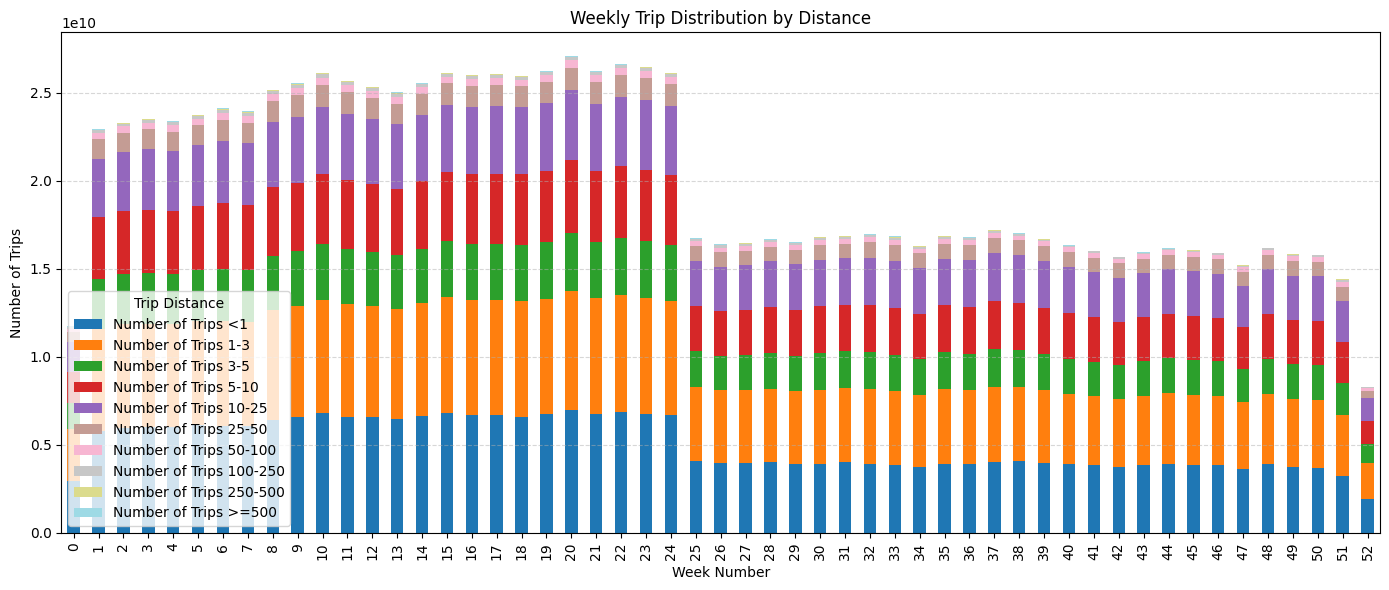

In [49]:
# Group by 'Week' and sum each bin for stacked bar
cols = [x for x in df.columns if 'Number of Trips ' in x]
weekly_bins = df.groupby('Week')[cols].sum()

# Plot: Stacked Bar Chart
weekly_bins.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Weekly Trip Distribution by Distance')
plt.xlabel('Week Number')
plt.ylabel('Number of Trips')
plt.legend(title='Trip Distance')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

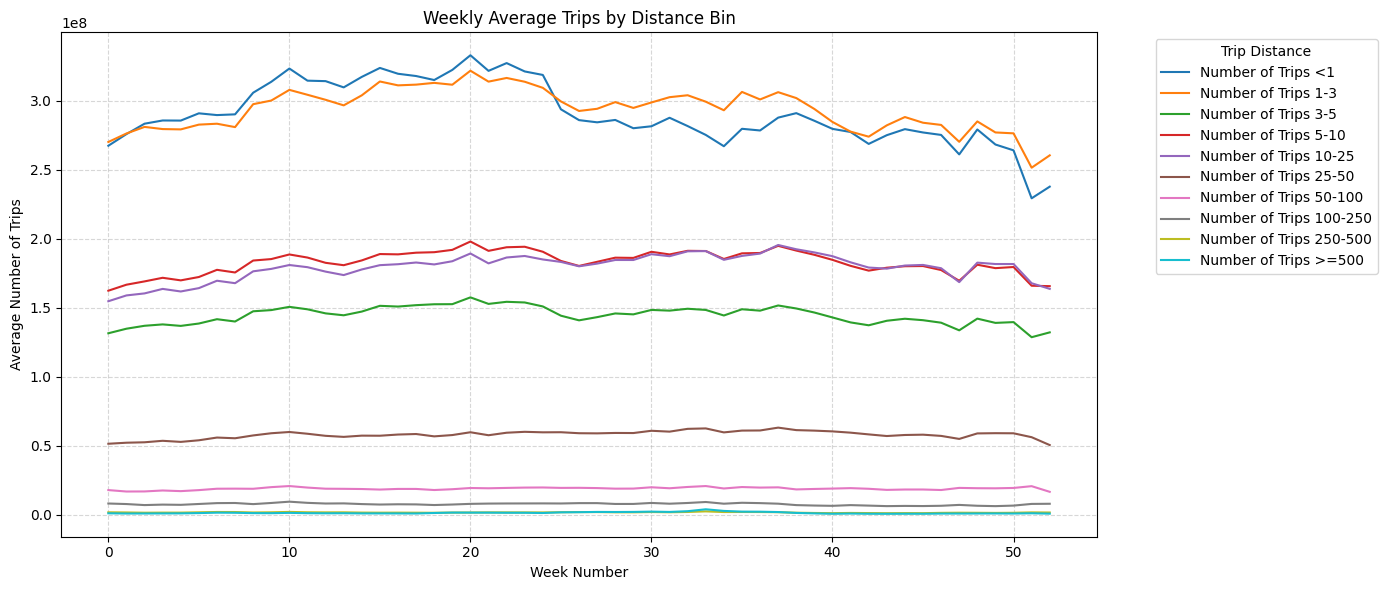

In [50]:
# Calculate weekly averages for each distance bin
weekly_avg = df.groupby('Week')[cols].mean()

# Plot: Line Chart
plt.figure(figsize=(14, 6))
for col in cols:
    plt.plot(weekly_avg.index, weekly_avg[col], label=col)

plt.title('Weekly Average Trips by Distance Bin')
plt.xlabel('Week Number')
plt.ylabel('Average Number of Trips')
plt.legend(title='Trip Distance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<hr>
# This is to visually represent the shape of the bins

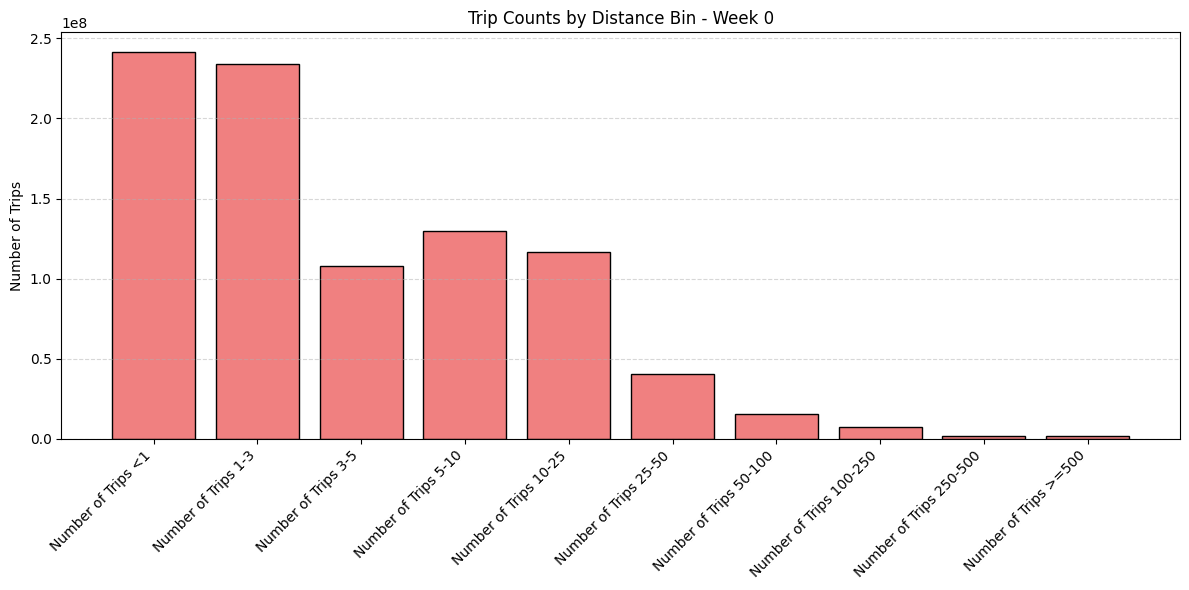

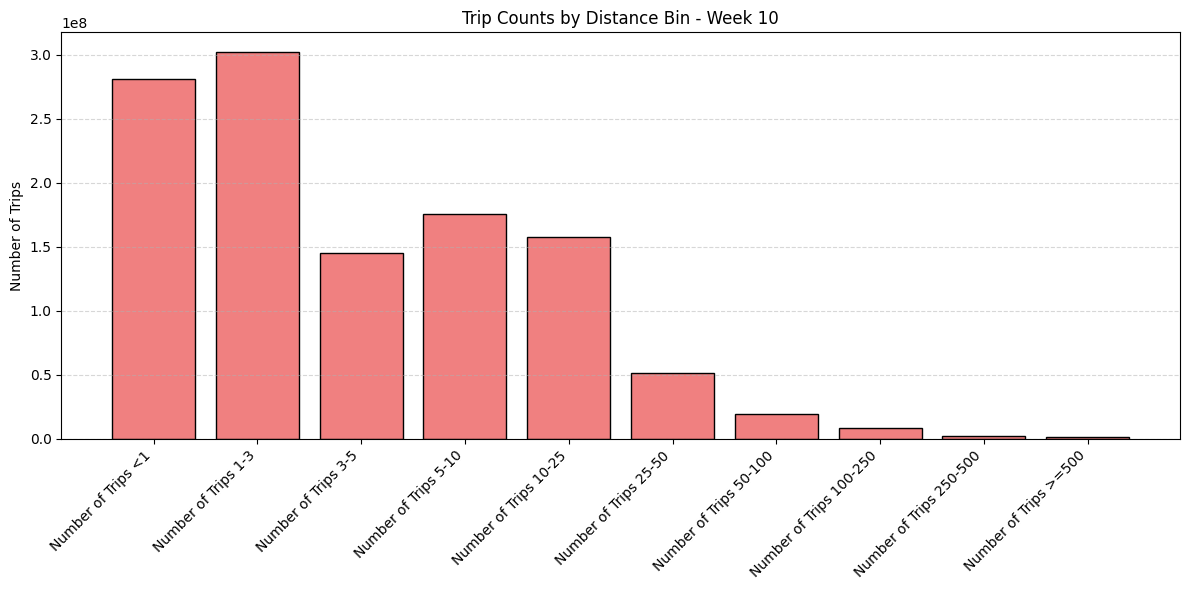

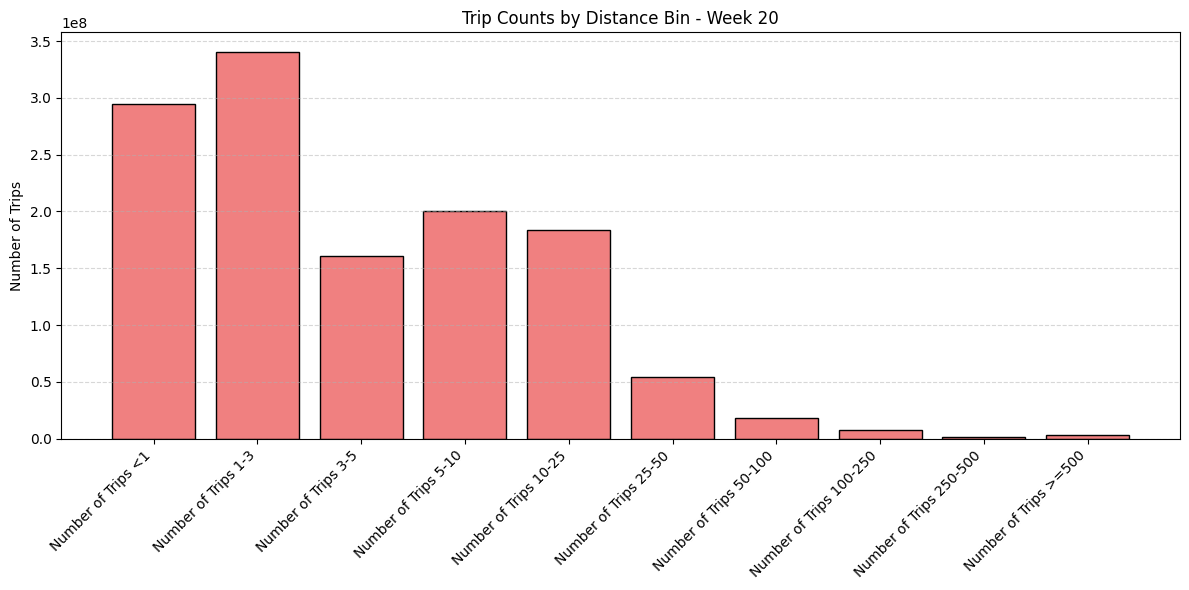

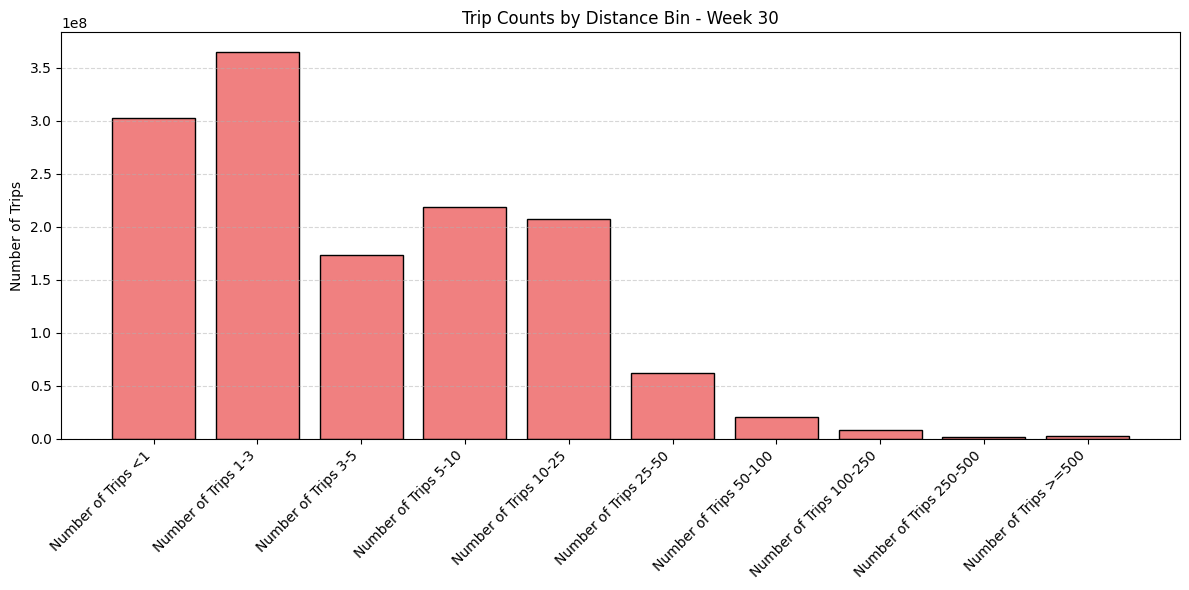

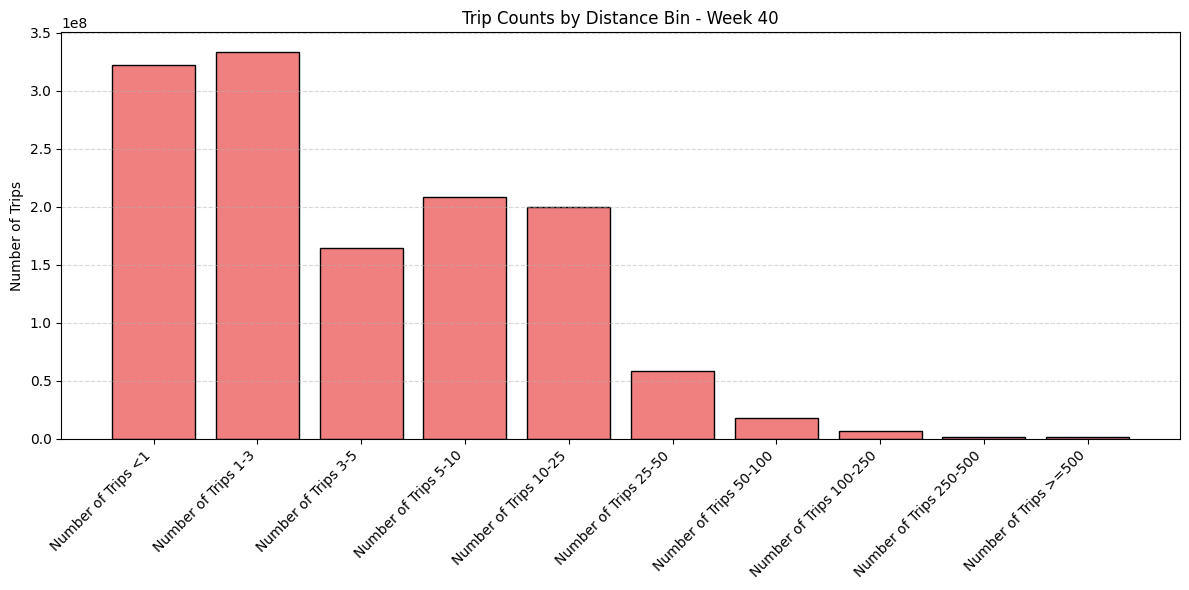

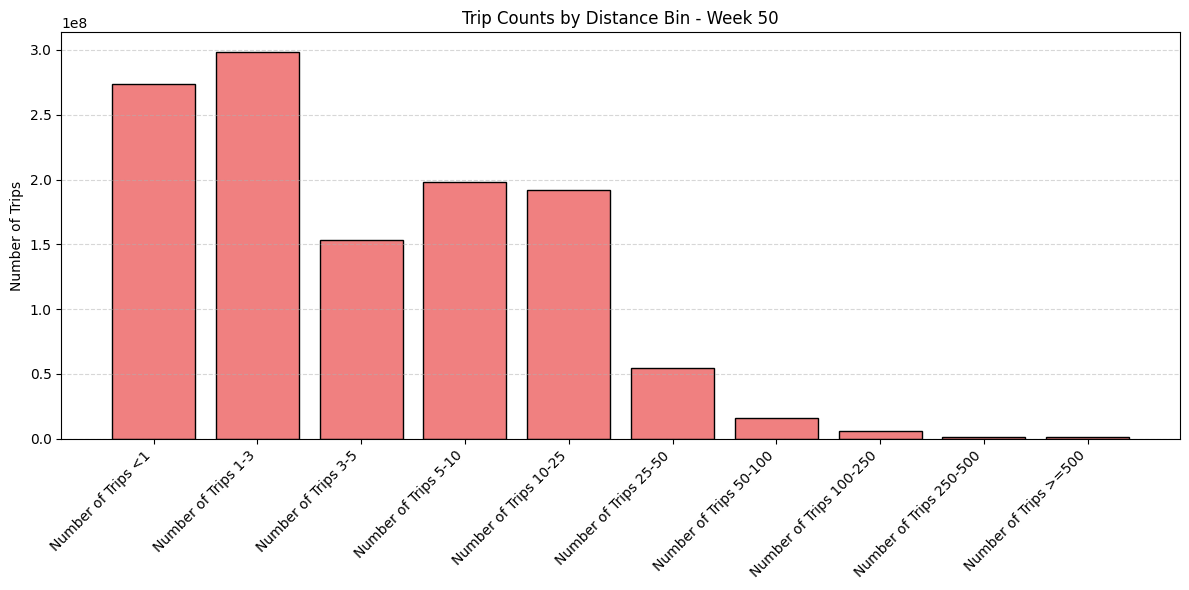

In [51]:

for week_number in range(6):
    week_number *= 10
# Filter the data for that week
    week_data = df[df['Week'] == week_number]

    # Use the first row that matches (or average if there are multiple rows per week)
    row = week_data.iloc[0]

    # Get Y values = number of trips in each bin
    trip_counts = [row[col] for col in cols]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(cols, trip_counts, color='lightcoral', edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Trips')
    plt.title(f'Trip Counts by Distance Bin - Week {week_number}')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.savefig(r'../graphs/fig_week_'+str(week_number))

In [52]:
df.columns

Index(['Level', 'Date', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')

In [53]:
def parse_ranges_to_dict(ranges):
    range_dict = {}
    for r in ranges:
        if '<' in r:
            start = 0
            end = float(r.split('<')[-1])
        elif '>=' in r:
            start = float(r.split('>=')[-1])
            end = start*2
        elif '-' in r:
            start, end = map(float, r.split('-'))
        else:
            raise ValueError(f"Invalid range format: {r}")
        range_dict[r] = (start, end)
    return range_dict


ranges = parse_ranges_to_dict([x.split(' ')[-1] for x in cols]).values()
print(ranges)

dict_values([(0, 1.0), (1.0, 3.0), (3.0, 5.0), (5.0, 10.0), (10.0, 25.0), (25.0, 50.0), (50.0, 100.0), (100.0, 250.0), (250.0, 500.0), (500.0, 1000.0)])


In [54]:
distance_bins={}
for cname,(start,end) in zip(cols,ranges):
    distance_bins[cname]=(start+end)/2


Weekly average distance per trip:
Week
0     10.724923
1     10.335161
2     10.041168
3     10.209901
4     10.158249
5     10.447013
6     10.918140
7     10.897361
8     10.307358
9     10.441244
10    10.716089
11    10.416363
12    10.280066
13    10.330432
14     9.984086
15     9.784432
16     9.911593
17     9.858994
18     9.926966
19    10.221811
20    10.211542
21    10.370721
22    10.324611
23    10.424868
24    10.396688
25    11.004050
26    11.294567
27    11.466897
28    11.182928
29    11.325531
30    11.741565
31    11.223588
32    11.973936
33    13.524497
34    12.280510
35    11.757406
36    11.811562
37    11.476480
38    10.597591
39    10.434470
40    10.377020
41    10.659099
42    10.487313
43    10.145617
44    10.070215
45    10.136870
46    10.337792
47    10.763247
48    10.436637
49    10.594701
50    10.715397
51    11.791856
52    10.894749
Name: Avg_Distance_Per_Trip, dtype: float64


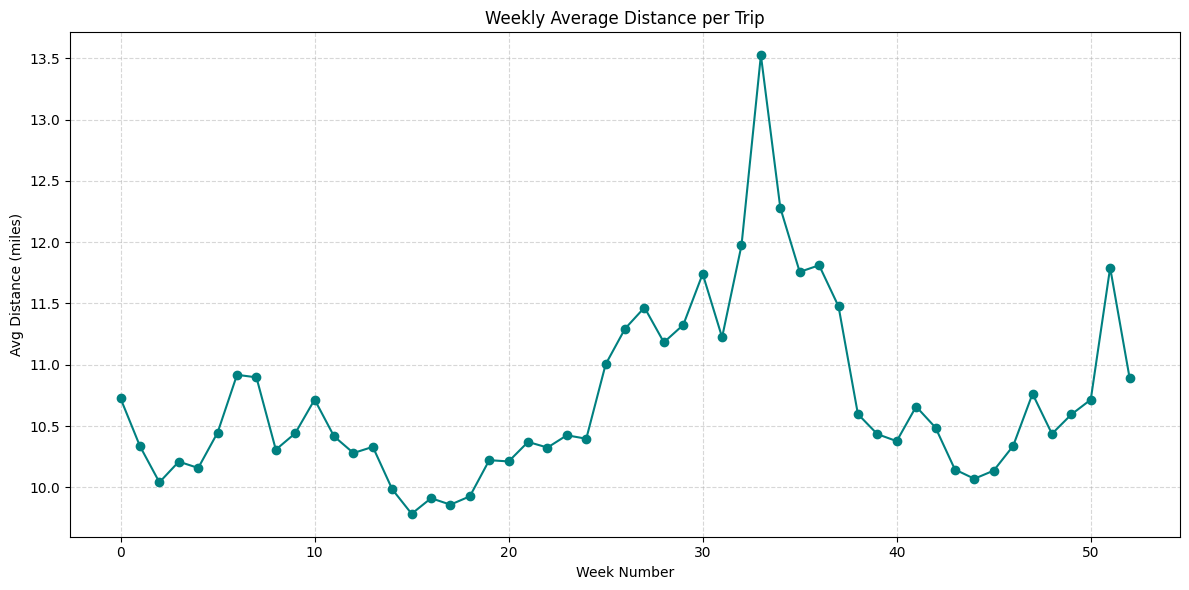

In [55]:


# Calculate total distance = sum(trips * midpoint) for each row
df['Total_Weighted_Distance'] = sum(df[col] * distance_bins[col] for col in cols)

# Calculate total number of trips = sum of all bins for each row
df['Total_Trips'] = df[cols].sum(axis=1)

# Avoid division by zero
df['Avg_Distance_Per_Trip'] = df['Total_Weighted_Distance'] / df['Total_Trips']

# Now group by week and take the average per week
weekly_avg_distance = df.groupby('Week')['Avg_Distance_Per_Trip'].mean()

# Show the result
print("Weekly average distance per trip:")
print(weekly_avg_distance)

# Optional: Plot it
plt.figure(figsize=(12, 6))
weekly_avg_distance.plot(marker='o', color='teal')
plt.title('Weekly Average Distance per Trip')
plt.xlabel('Week Number')
plt.ylabel('Avg Distance (miles)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

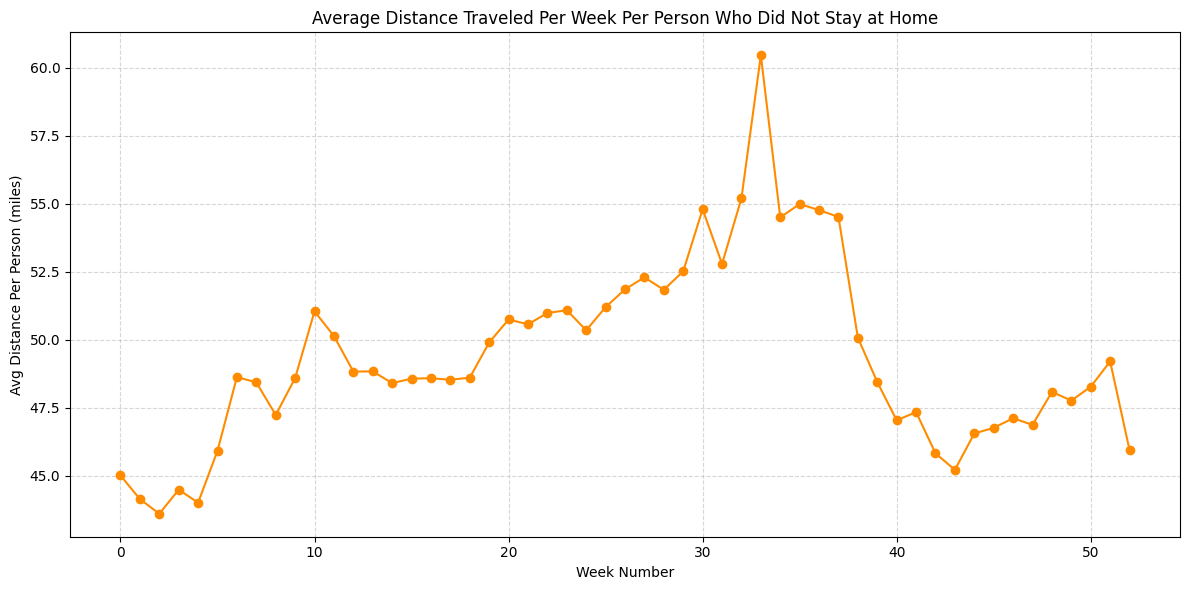

In [56]:
# Group by 'Week' and calculate the sum for each bin
grouped_by_week_sum = df.groupby('Week').sum(numeric_only=True)

# Calculate total distance traveled per week
total_distance_per_week = (grouped_by_week_sum[cols] * list(distance_bins.values())).sum(axis=1)

# Calculate average distance traveled per person who did not stay at home
avg_distance_per_person = total_distance_per_week / grouped_by_week_sum['Population Not Staying at Home']

trips_vs_people = grouped_by_week_sum['Number of Trips']/grouped_by_week_sum['Population Not Staying at Home']

# Plot the graph
plt.figure(figsize=(12, 6))
avg_distance_per_person.plot(marker='o', color='darkorange')
plt.title('Average Distance Traveled Per Week Per Person Who Did Not Stay at Home')
plt.xlabel('Week Number')
plt.ylabel('Avg Distance Per Person (miles)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

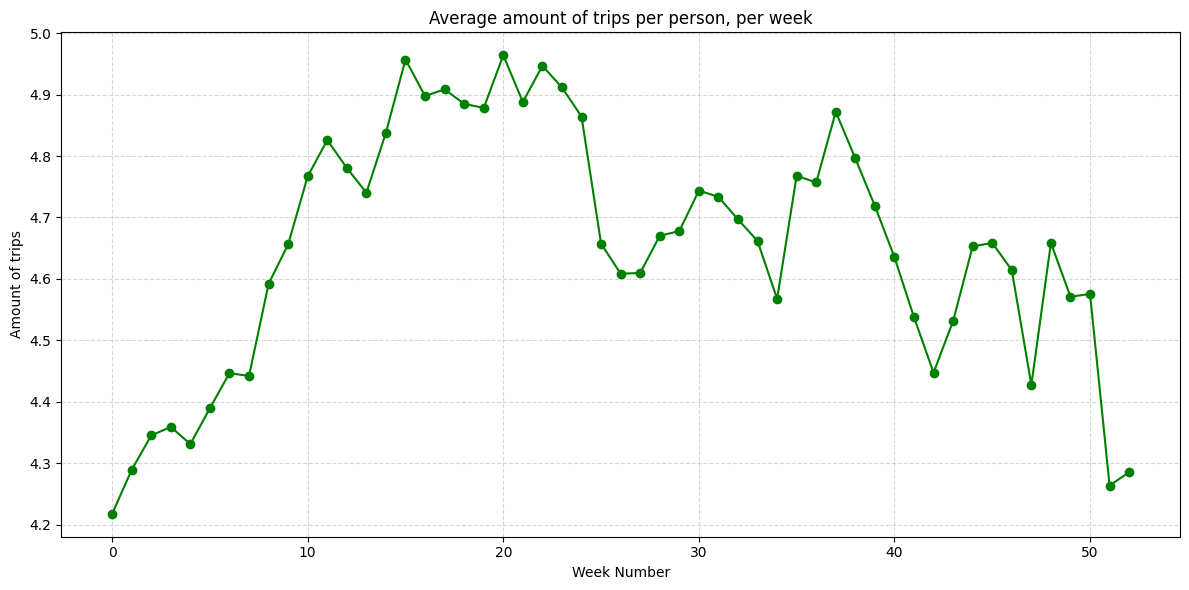

In [57]:
# Plot the graph
plt.figure(figsize=(12, 6))
trips_vs_people.plot(marker='o', color='green')
plt.title('Average amount of trips per person, per week')
plt.xlabel('Week Number')
plt.ylabel('Amount of trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

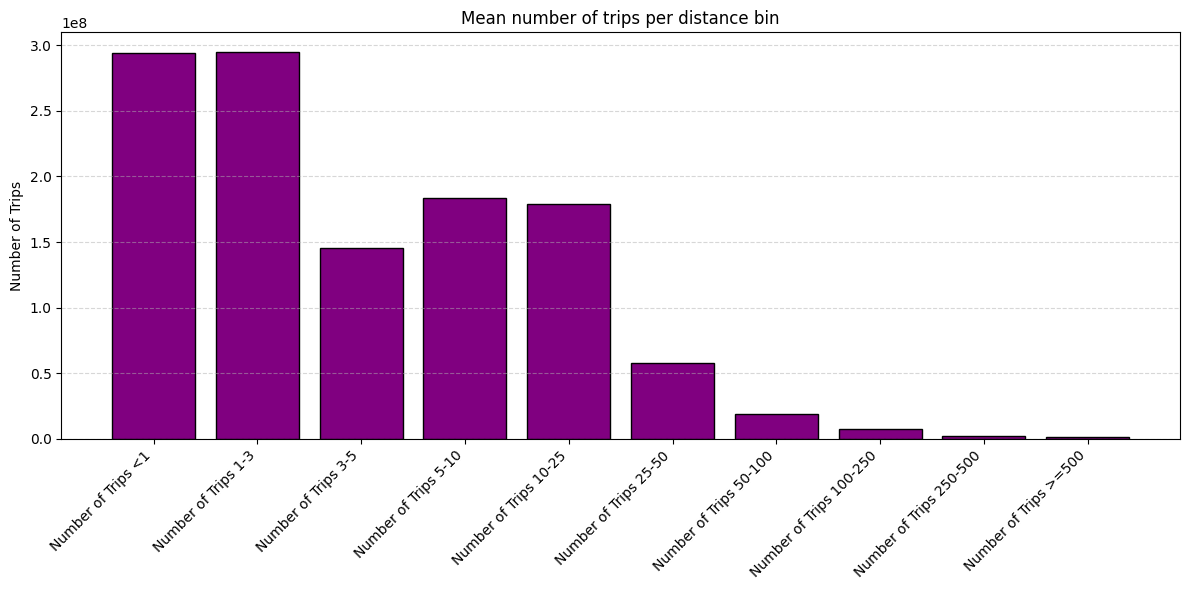

In [58]:

# Use the first row that matches (or average if there are multiple rows per week)
means = df[cols].mean()

# Get Y values = number of trips in each bin
trip_means = [means[col] for col in cols]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(cols, trip_means, color='purple', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Trips')
plt.title(f'Mean number of trips per distance bin')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig(r'../graphs/mean_weekly_travel')

In [59]:
ranges

dict_values([(0, 1.0), (1.0, 3.0), (3.0, 5.0), (5.0, 10.0), (10.0, 25.0), (25.0, 50.0), (50.0, 100.0), (100.0, 250.0), (250.0, 500.0), (500.0, 1000.0)])

## Question 2

In [60]:
# Identify the dates that > 10000000 people conducted 10-25 Number of Trips and
# compare them to them that the same number of people (> 10000000) conducted 
# 50-100 Number of trips.

In [61]:
df.columns

Index(['Level', 'Date', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month',
       'Total_Weighted_Distance', 'Total_Trips', 'Avg_Distance_Per_Trip'],
      dtype='object')

In [62]:
qualifying_shorter_trips = df[df['Number of Trips 10-25']>10000000]
qualifying_longer_trips = df[df['Number of Trips 50-100']>10000000]

In [63]:
qualifying_shorter_trips.shape

(901, 21)

We can see that only 1 day does not meet both criteria.

In [64]:
[x for x in qualifying_shorter_trips['Date'] if x not in qualifying_longer_trips['Date'].values]

[Timestamp('2020-04-12 00:00:00')]

We can conclude that only April 12th, 2020 did not have >10000000 trips between 50 and 100 miles

In [ ]:
sns.scatterplot(data=qualifying_shorter_trips,x='Date',y='Number of Trips 10-25',hue="Number of Trips 10-25")
plt.xticks(rotation=45, ha='right')
plt.title("Days with >10,000,000 trips in the 10-25 mile range")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

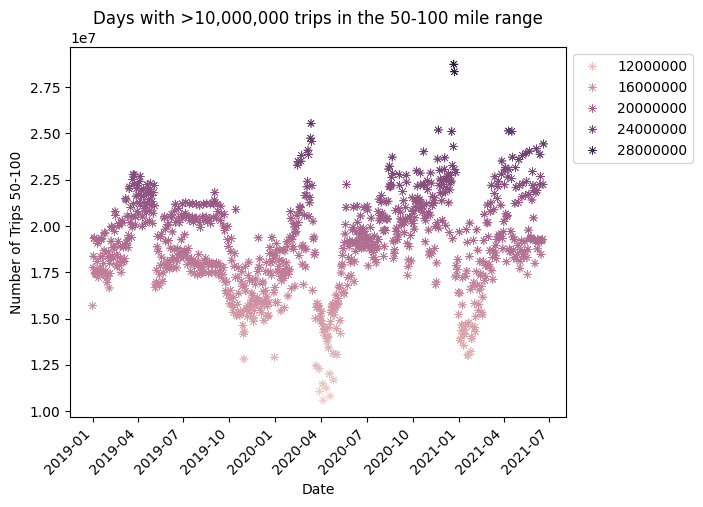

In [89]:
sns.scatterplot(data=qualifying_longer_trips,x='Date',y='Number of Trips 50-100',marker=(8,2,0),hue='Number of Trips 50-100')
plt.xticks(rotation=45, ha='right')
plt.title("Days with >10,000,000 trips in the 50-100 mile range")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()